<img align="right" src="https://prnewswire2-a.akamaihd.net/p/1893751/sp/189375100/thumbnail/entry_id/1_p33qkid5/def_height/46/def_width/200/version/100011/type/1">

### Solution By: Suraj Ekka
Last updated Dec 04, 2020

### Project - All Bank Clustering Problem

**Objective:** To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank. 

**Data Description:** Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

- Customer key - Identifier for the customer
- Average Credit Limit - Average credit limit across all the credit cards
- Total credit cards - Total number of credit cards
- Total visits bank - Total number of bank visits
- Total visits online - total number of online visits
- Total calls made - Total number of calls made by the customer


`GitHub Link`



In [1]:
#Packages for data processing
import pandas as pd
import numpy as np

#Packages for Ploting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

#To warnings turn off
import warnings
warnings.filterwarnings('ignore')

#modeling package
from sklearn.model_selection import train_test_split
from scipy import stats
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, classification_report


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import os

In [2]:
df = pd.read_csv('Credit Card Customer Data.csv')
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


#### Exploratory Data Analysis

In [3]:
df.shape

(660, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


**Checking basic statistics like central value, std, quartiles about the data**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


#### The data does not contain any missing values or special symbols.

#### Skewness defination:
- skewness = 0 : normally distributed.
- skewness > 0 : more weight in the left tail of the distribution.
- skewness < 0 : more weight in the right tail of the distribution.

In [6]:
df.skew()

Sl_No                  0.000000
Customer Key           0.051462
Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

*Overall data seems mildly positively skewed*
___

#### Features other than Avg_credit_limit and Total_visits_online are slightly positively skewed.

In [7]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
df.isna().sum()
#### No Missing Values

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
df.nunique()
# No Unique key

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

#### Dataframe has 660 observations but observing following changes:
- Observing some duplicacy Customer key as # 655
- Remaining changes seems valid (credit limit, # credit cards, bank visits, online visits and calls made


##### Need to do treatment for duplicate values

In [10]:
# import pandas as pd
ids = df["Customer Key"]
df[ids.isin(ids[ids.duplicated()])].sort_values(["Customer Key","Avg_Credit_Limit"],ascending = (True, False))

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
432,433,37252,59000,6,2,1,2
48,49,37252,6000,4,0,2,8
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
541,542,50706,60000,7,5,2,2
411,412,50706,44000,4,5,0,2
398,399,96929,67000,6,2,2,2
391,392,96929,13000,4,5,0,0
632,633,97935,187000,7,1,7,0
104,105,97935,17000,2,1,2,10


##### In duplicate records following are our observations:

- Changes (increase) in Credit Limit
- Changes (increase/ decrease) in Credit cards
- Changes (increase/ decrease) in Bank Visits
- Changes (increase/ decrease) in Online visits
- Changes (increase/ decrease) in Calls made

**Suggestion:** We can keep latest record of each duplicate observation

In [11]:
df = df.sort_values(["Customer Key","Avg_Credit_Limit"],ascending = (True, False))
df = df.drop_duplicates(subset='Customer Key', keep='first')
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
520,521,99437,39000,6,4,0,4
592,593,99473,54000,5,4,2,1
80,81,99589,20000,2,2,4,8
205,206,99596,17000,1,0,5,5
640,641,99843,123000,8,1,15,2


In [12]:
df.shape

(655, 7)

In [13]:
# Random check to make sure that from duplicated observations, we are considering observation with highest credit limit
df[df['Customer Key'] == 96929]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
398,399,96929,67000,6,2,2,2


### Univariate and Bivariate Analysis

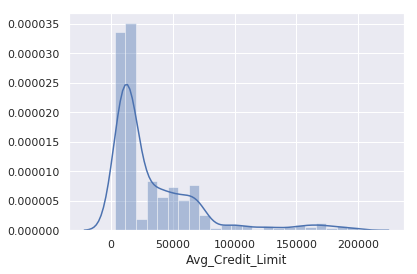

In [14]:
sns.distplot(df['Avg_Credit_Limit'])
plt.show()

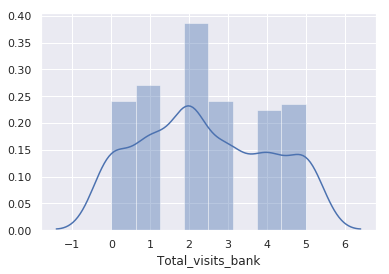

In [15]:
sns.distplot(df['Total_visits_bank'])
plt.show()

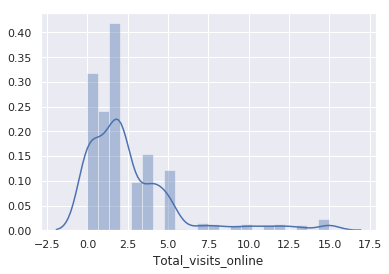

In [16]:
sns.distplot(df['Total_visits_online'])
plt.show()

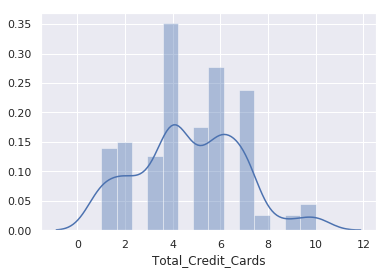

In [17]:
sns.distplot(df['Total_Credit_Cards'])
plt.show()

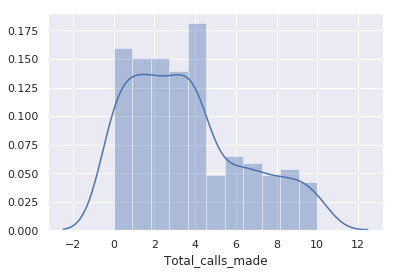

In [18]:
sns.distplot(df['Total_calls_made'])
plt.show()

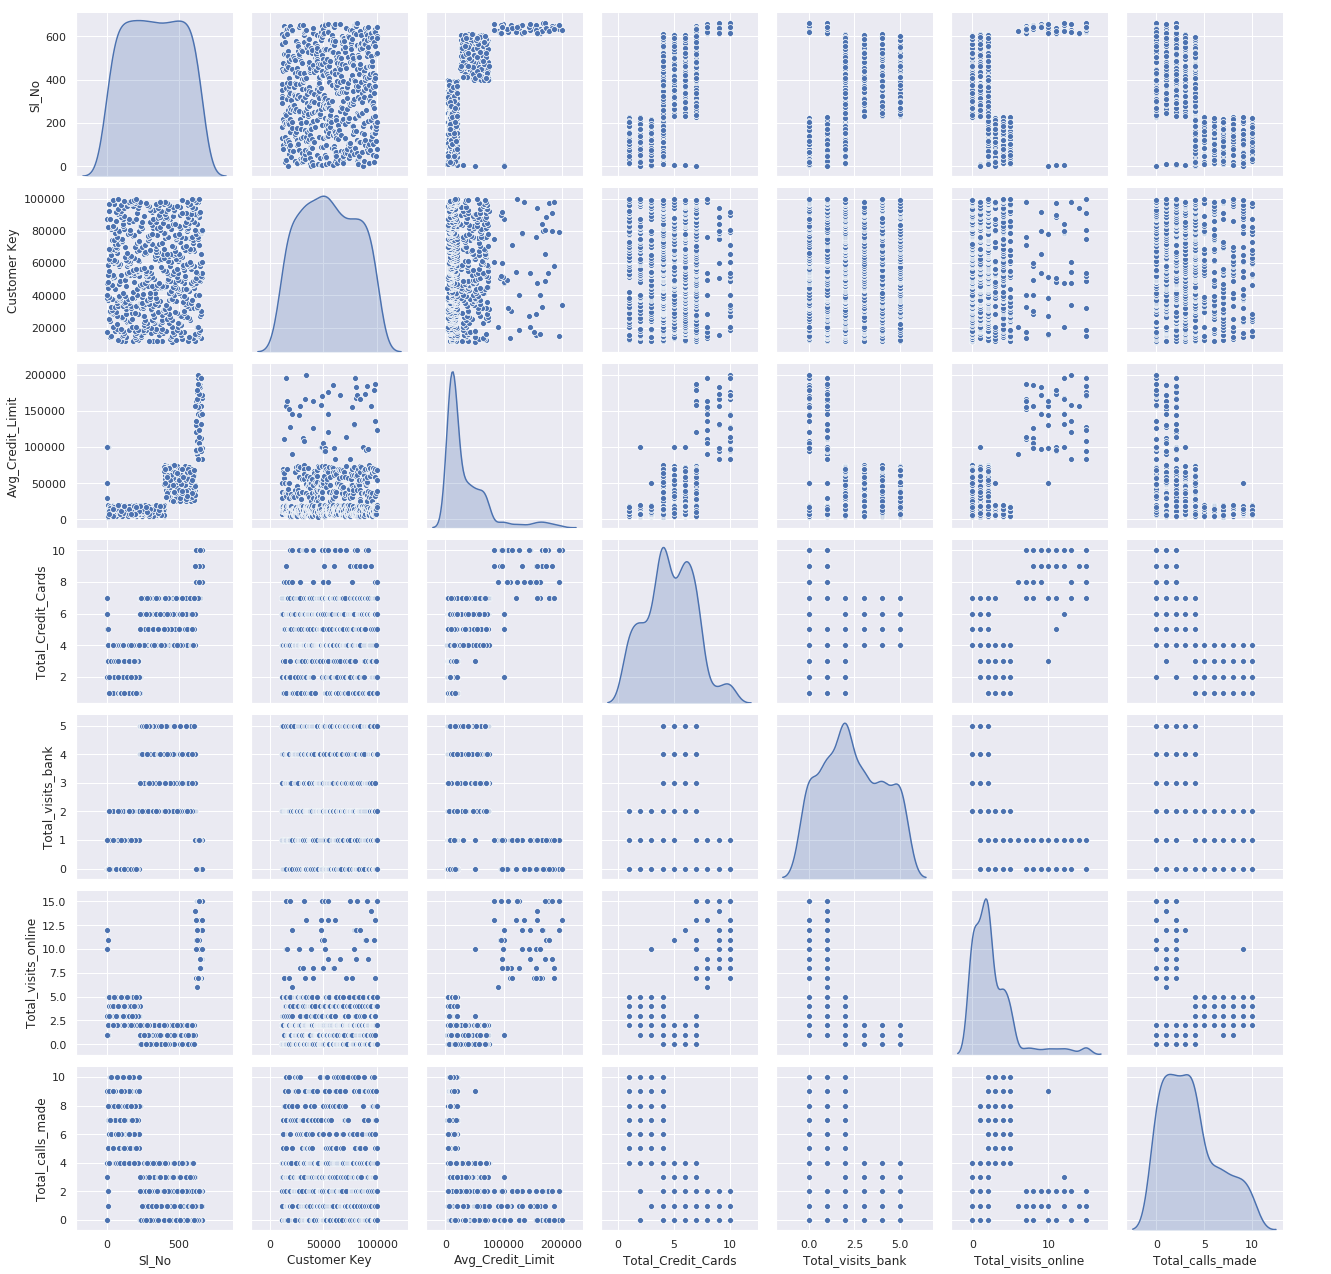

In [19]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [20]:
# Dropping variables with unique values
df.drop(columns = {'Sl_No', 'Customer Key'}, inplace=True)
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
450,51000,7,3,2,0
378,12000,6,5,2,1
179,19000,2,2,3,4
321,9000,7,5,0,0
609,38000,4,3,2,0


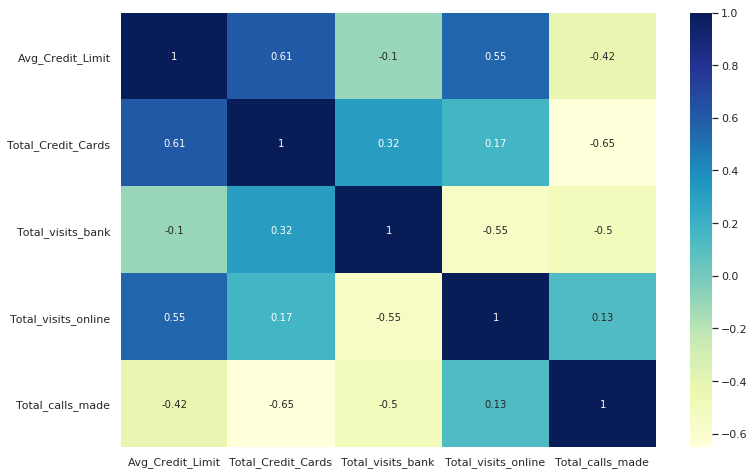

In [21]:
plt.figure(figsize=(12,8))
corr_DF = df.corr()
sns.heatmap(corr_DF, annot = True, cmap="YlGnBu")
plt.show()

#### From above, we can see:
- Positive coorelation between "Total visits online & Avg Credit limit" 
- Positive coorelation between "Avg credit limit & Total credit cards"
- Negitive corelation between  "Total Calls made & Avg_Credit_Limit"
- Negative coorelation between "Total visits online and Total visits bank"

In [22]:
df.tail()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
520,39000,6,4,0,4
592,54000,5,4,2,1
80,20000,2,2,4,8
205,17000,1,0,5,5
640,123000,8,1,15,2


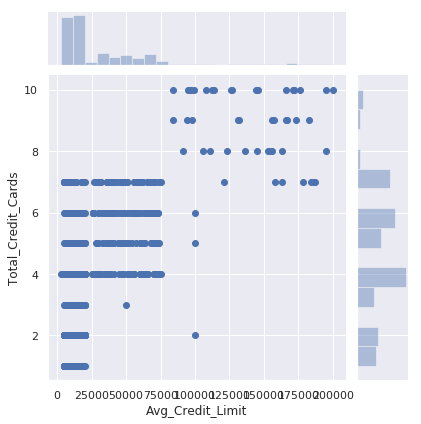

In [23]:
# Higher the number of credit cards, higher the credit limit
sns.jointplot(df['Avg_Credit_Limit'],df['Total_Credit_Cards'])
plt.show()

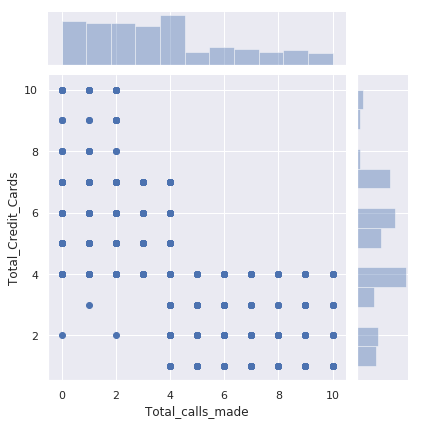

In [24]:
# lower the number of cards, higher the call volume
sns.jointplot(df['Total_calls_made'],df['Total_Credit_Cards'])
plt.show()

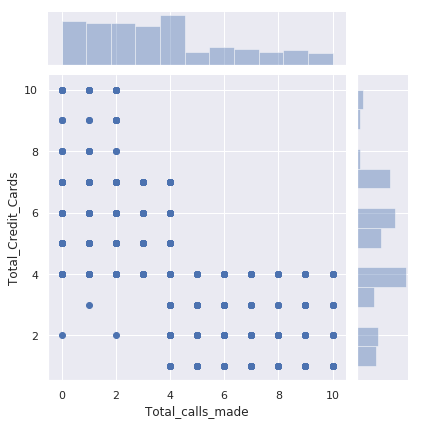

In [25]:
# lower the number of cards, higher the call volume
sns.jointplot(df['Total_calls_made'],df['Total_Credit_Cards'])
plt.show()

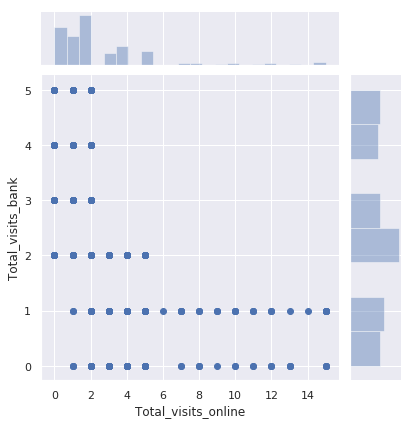

In [26]:
# Lower the number of bank visits, higher the number of online visits
sns.jointplot(df['Total_visits_online'],df['Total_visits_bank'])
plt.show()

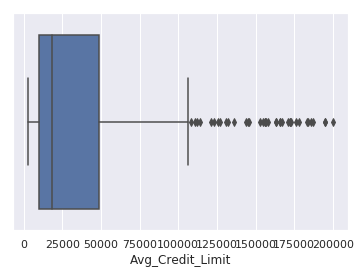

In [27]:
sns.boxplot(df['Avg_Credit_Limit'])
plt.show()

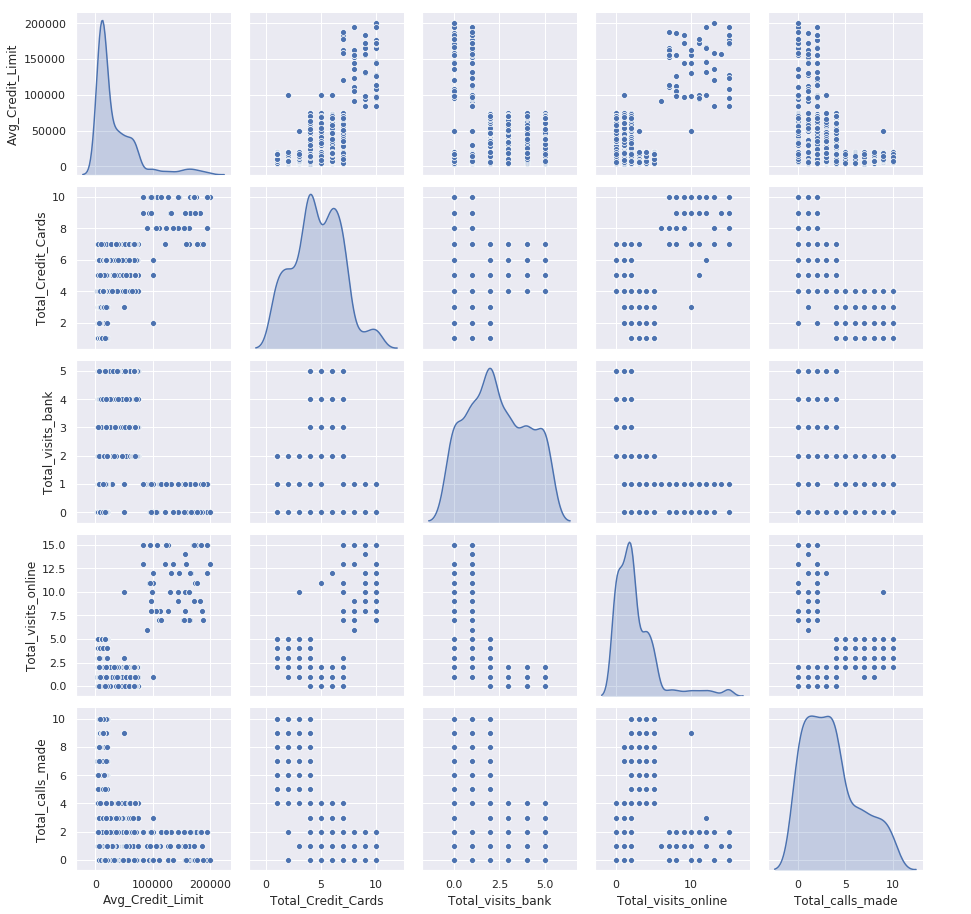

In [28]:
# import seaborn as sns
sns.pairplot(df, diag_kind='kde') 
plt.show()

In [29]:
##Scale the data
from scipy.stats import zscore

df_z = df.apply(zscore)

### K-Means

In [30]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

In [31]:
def evaluate_metrics(df, min_clust=3, max_clust=10, rand_state=1):
    inertias = []
    silhouette = []
    ch_score = []
    db_score = []
    for n_clust in range(min_clust, max_clust):
        kmeans = KMeans(n_clusters=n_clust, random_state=rand_state)
        y_label = kmeans.fit_predict(df)
        inertias.append(kmeans.inertia_)
        silhouette.append(silhouette_score(df, y_label))
        ch_score.append(calinski_harabasz_score(df, y_label))
        db_score.append(davies_bouldin_score(df, y_label))        

    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    ax[0][0].plot(range(min_clust, max_clust), inertias, '-x', linewidth=2)
    ax[0][0].set_xlabel('No. of clusters')
    ax[0][0].set_ylabel('Inertia')
    
    ax[0][1].plot(range(min_clust, max_clust), silhouette, '-x', linewidth=2)
    ax[0][1].set_xlabel('No. of clusters')
    ax[0][1].set_ylabel('Silhouette Score')
    
    ax[1][0].plot(range(min_clust, max_clust), ch_score, '-x', linewidth=2)
    ax[1][0].set_xlabel('No. of clusters')
    ax[1][0].set_ylabel('Calinski Harabasz Score')
    
    ax[1][1].plot(range(min_clust, max_clust), db_score, '-x', linewidth=2)
    ax[1][1].set_xlabel('No. of clusters')
    ax[1][1].set_ylabel('Davies Bouldin Score')
    fig.suptitle('Metrics to evaluate the number of clusters')
    plt.show()

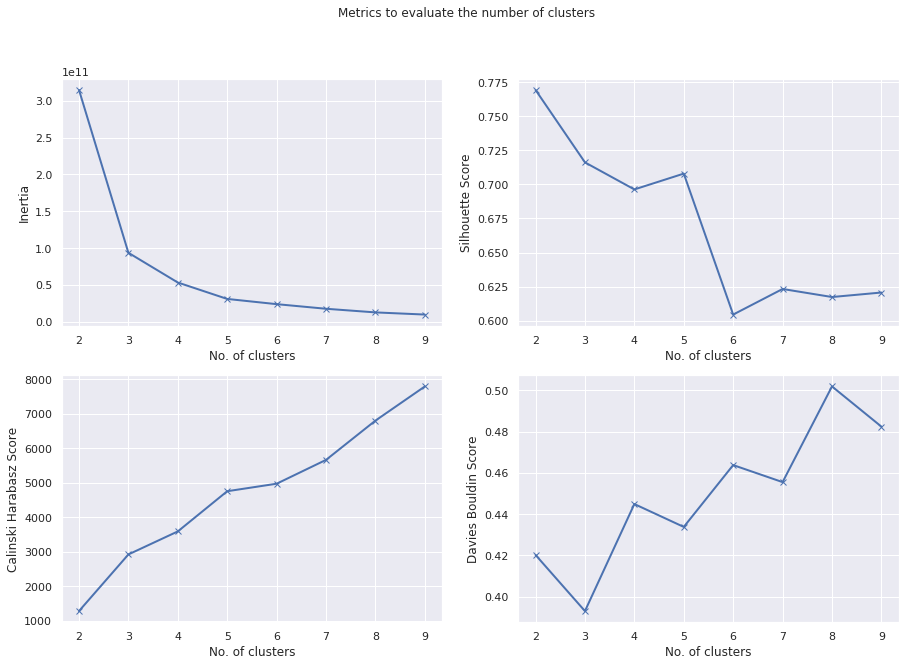

In [32]:
evaluate_metrics(df.iloc[:, :-2], min_clust=2, max_clust=10, rand_state=0)

Text(0.5,1,'Selecting k with the Elbow Method')

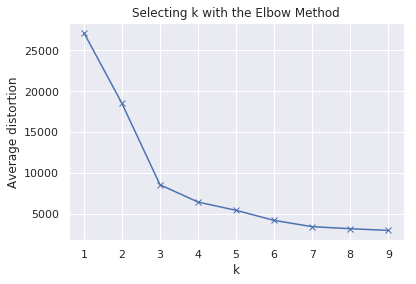

In [33]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df)
    prediction=model.predict(df)
    meanDistortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [34]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [35]:
kmeans.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [36]:
centroids = kmeans.cluster_centers_

In [37]:
centroids

array([[-0.59708296, -1.06223867, -0.8994134 ,  0.32284397,  1.14764832],
       [-0.0221829 ,  0.37320193,  0.66578849, -0.55483952, -0.55070751],
       [ 2.82096934,  1.85761293, -1.10654432,  2.8166435 , -0.87713902]])

In [38]:
#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(df_z) )

In [39]:
print(centroid_df)

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         -0.597083           -1.062239          -0.899413   
1         -0.022183            0.373202           0.665788   
2          2.820969            1.857613          -1.106544   

   Total_visits_online  Total_calls_made  
0             0.322844          1.147648  
1            -0.554840         -0.550708  
2             2.816644         -0.877139  


In [40]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
450,51000,7,3,2,0
378,12000,6,5,2,1
179,19000,2,2,3,4
321,9000,7,5,0,0
609,38000,4,3,2,0


In [41]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [42]:
# Joining the label dataframe with the data frame.
df_labeled = df.join(df_labels)

In [43]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
450,51000,7,3,2,0,1
378,12000,6,5,2,1,1
179,19000,2,2,3,4,1
321,9000,7,5,0,0,1
609,38000,4,3,2,0,1
...,...,...,...,...,...,...
520,39000,6,4,0,4,1
592,54000,5,4,2,1,1
80,20000,2,2,4,8,1
205,17000,1,0,5,5,1


In [44]:
df_labeled['labels'].value_counts()  

1    380
0    220
2     50
Name: labels, dtype: int64

In [45]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
450,51000,7,3,2,0
378,12000,6,5,2,1
179,19000,2,2,3,4
321,9000,7,5,0,0
609,38000,4,3,2,0


In [46]:
# Let us try with K = 3 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

Text(0.5,0.92,'3D plot of KMeans Clustering')

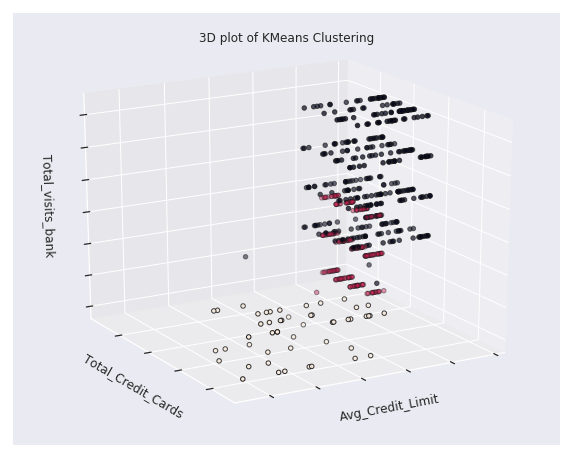

In [47]:
## 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(3)
k3_model.fit(df_z)
labels = k3_model.labels_
ax.scatter(df_z.iloc[:, 0], df_z.iloc[:, 1], df_z.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Avg_Credit_Limit')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Total_visits_bank')
ax.set_title('3D plot of KMeans Clustering')

In [48]:
# Let us try with K = 3 (to demonstrate the 3d plot)
final_model=KMeans(3)
final_model.fit(df_z)
prediction=final_model.predict(df_z)

#Append the prediction 
df_kmeans=df.copy()
df_kmeans["GROUP"] = prediction
print("Groups Assigned : \n")
df_kmeans[["Avg_Credit_Limit", "GROUP"]]



Groups Assigned : 



,Avg_Credit_Limit,GROUP
450,51000,2
378,12000,2
179,19000,0
321,9000,2
609,38000,2
...,...,...
520,39000,2
592,54000,2
80,20000,0
205,17000,0


In [49]:
df_zkmeans = df_z.copy()
df_zkmeans["GROUP"] = prediction


In [50]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=3): {silhouette_score(df_z, prediction)}')

Silhouette Score(n=3): 0.5154656016306923


In [51]:
df_kmeans.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
450,51000,7,3,2,0,2
378,12000,6,5,2,1,2
179,19000,2,2,3,4,0
321,9000,7,5,0,0,2
609,38000,4,3,2,0,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0e7c82860>,
      dtype=object)

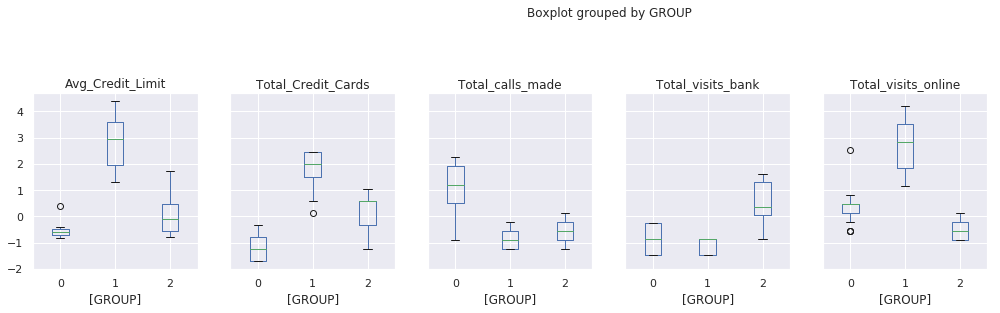

In [52]:
# Analysis of clusters using Box Plots
# Check if all clusters are not overlapping and far from each other
df_zkmeans.boxplot(by = 'GROUP',  layout=(4,6), figsize=(20, 15))

In [53]:
round(df_kmeans.groupby('GROUP').mean().T, 2)

GROUP,0,1,2
Avg_Credit_Limit,12180.18,141040.00,33853.79
Total_Credit_Cards,2.41,8.74,5.52
Total_visits_bank,0.94,0.60,3.48
Total_visits_online,3.57,10.90,0.99
Total_calls_made,6.85,1.08,2.01


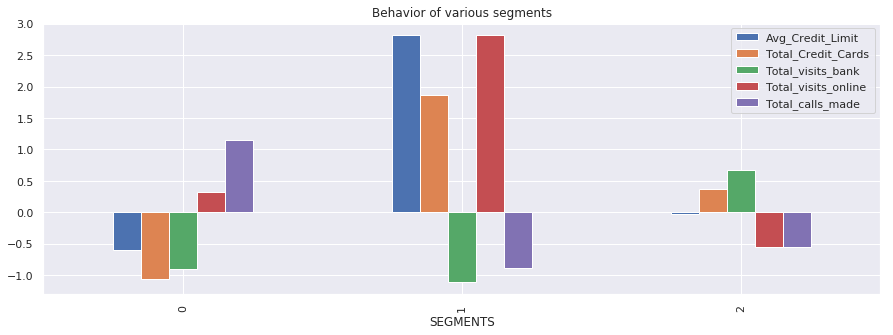

In [54]:
# Behavioral Analysis of Segments
(df_zkmeans[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made', 'GROUP']]
 .groupby('GROUP').mean().plot.bar(figsize=(15, 5)))
plt.title('Behavior of various segments')
plt.xlabel('SEGMENTS');

### Hierarchical Clustering

In [55]:
from sklearn.cluster import AgglomerativeClustering 

In [56]:
df_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
450,0.432626,1.055582,0.368848,-0.210294,-1.256040
378,-0.601862,0.594644,1.598342,-0.210294,-0.905206
179,-0.416185,-1.249105,-0.245899,0.129811,0.147297
321,-0.681438,1.055582,1.598342,-0.890505,-1.256040
609,0.087797,-0.327230,0.368848,-0.210294,-1.256040


In [57]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [58]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [59]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_z))

c

0.8974913650544314

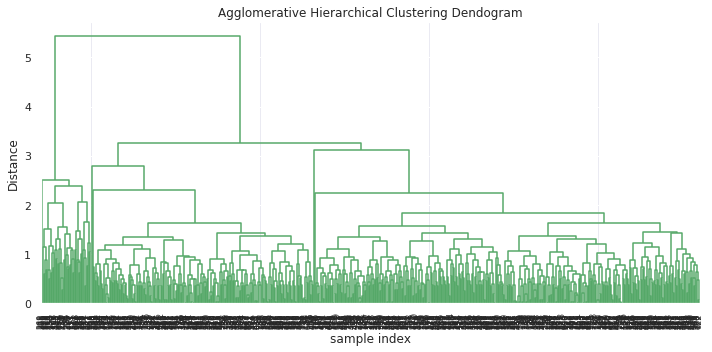

In [60]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [61]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_z, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df_z))

c

0.8760513526276662

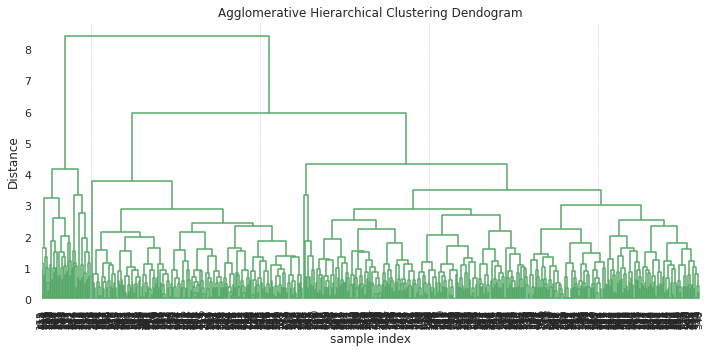

In [62]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [63]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_z, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df_z))

c

0.74193911973391

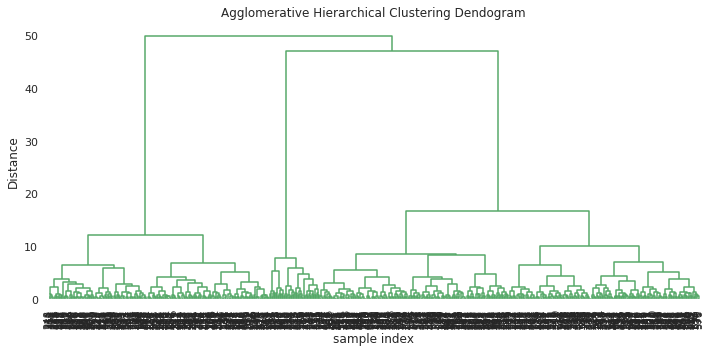

In [64]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

##### As highest cophenet index is coming out for metric='euclidean', method='average'. Creating euclidean model with average linkage

In [65]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
#clt = AgglomerativeClustering(linkage="complete", affinity="euclidean", n_clusters=3)
model.fit(df_z)
#model = clt.fit(df_z)
predict_hier=model.fit_predict(df_z)

In [66]:


#Append the prediction 
df_hier=df.copy()
df_hier["GROUP"] = predict_hier
print("Groups Assigned : \n")
df_hier[["Avg_Credit_Limit", "GROUP"]]


Groups Assigned : 



,Avg_Credit_Limit,GROUP
450,51000,0
378,12000,0
179,19000,2
321,9000,0
609,38000,0
...,...,...
520,39000,0
592,54000,0
80,20000,2
205,17000,2


In [67]:

#df_hier=df.copy()
#clusters = pd.DataFrame(model.fit_predict(df_z))
#df_hier["Cluster"] = clusters


Text(0.5,0.92,'3D plot of Agglomerative Clustering')

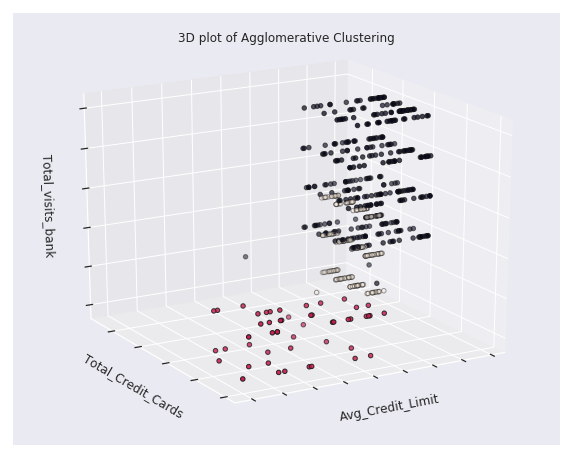

In [68]:
## 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
ax.scatter(df_hier.iloc[:, 0], df_hier.iloc[:, 1], df_hier.iloc[:, 2],c=df_hier["GROUP"].astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Avg_Credit_Limit')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Total_visits_bank')
ax.set_title('3D plot of Agglomerative Clustering')

In [69]:

df_hier.groupby(["GROUP"]).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,384,384,384,384,384
1,50,50,50,50,50
2,221,221,221,221,221


In [70]:
round(df_hier.groupby('GROUP').mean().T, 2)

GROUP,0,1,2
Avg_Credit_Limit,33783.85,141040.00,12203.62
Total_Credit_Cards,5.52,8.74,2.40
Total_visits_bank,3.48,0.60,0.93
Total_visits_online,0.99,10.90,3.57
Total_calls_made,2.02,1.08,6.86


In [71]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=3): {silhouette_score(df_z, predict_hier)}')

Silhouette Score(n=3): 0.5156749759980855


Groups Assigned : 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0e77ab208>,
      dtype=object)

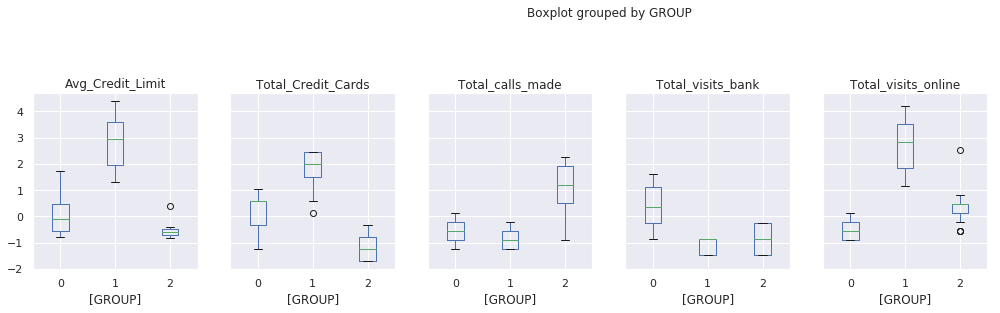

In [72]:
df_hier1=df_z.copy()
df_hier1["GROUP"] = predict_hier
print("Groups Assigned : \n")
df_hier1[["Avg_Credit_Limit", "GROUP"]]

# Analysis of clusters using Box Plots
# Check if all clusters are not overlapping and far from each other
df_hier1.boxplot(by = 'GROUP',  layout=(4,6), figsize=(20, 15))

## Key Questions with Answers

### How many different segments of customers are there?
**Answer : 3**
___

### How are these segments different from each other?
#### Explaination:  

**Segment 2 :** has the highest credit limit, most number of credit cards and highest number of online visits.

**Segment 1 :** has the lowest credit limit with highest numbers of calls made. Total visits bank and total visits online for this category is between segment 0 & 2

**Segment 0:** This segment has the average credit limit between segment 1 & 2. These customers have highest numbers of visits to bank but lowest visits online. Total number of credit cards this category has is between segment 1 & 2. Total number of calls made by this category is also between segment 1 & 2.
___

### What are your recommendations to the bank on how to better market to and service these customers?

#### Explaination: 
**Segment 2 (K-Means) and Segment 1 (Hierarchical):** These customers are revenue generators for the bank. I would say they are executive customers. Bank should give them online deals as well as priority should be given to them when they call Customer care so that this category stays happy.

**Segment 0 (Both in K-means and Hierarchical):** This category is the most fragile category. They can either be promoters or detractors to the bank based on the services given. Bank should give them hightest importance in terms of services and upsell. This is a legacy category who still wants to visit the bank rather than online visit. Bank should allocate this category a personal relationship manager so that they don't face any problems while visiting banks. Bank should also try to up sell credit cards to this category. 

**Segment 1 (K-Means) and Segment 2 (Hierarchical):** This is the most unsatisfied category (Detractors) with highest number of calls to the bank and least credit limit. Bank should give them some personalized deals but should be given less focus as compared to Segement 0.
